# Chapter 9 - Moving Average Smoothing

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions.

After completing this tutorial, you will know:
- How moving average smoothing works and some expectations of your data before you can use it.
- How to use moving average smoothing for data preparation and feature engineering.
- How to use moving average smoothing to make predictions.

## 9.1 Moving Average Smoothing

Smoothing is a technique applied to time series **to remove the fine-grained variation between time steps**. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting. Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value. The moving part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series.

### 9.1.1 Centered Moving Average

The value at time (t) is calculated as the average of raw observations at, before, and after time (t). 

For example, a center moving average with a window of 3 would be calculated as:
        center_ma(t) = mean(obs(t - 1), obs(t), obs(t + 1))
      
A `center moving average` **can be used as a general method to remove trend and seasonal components from a time series**, a method that we often cannot use when forecasting.     

### 9.1.2 Trailing Moving Average

The value at time (t) is calculated as the average of the raw observations at and before the time (t).

For example, a trailing moving average with a window of 3 would be calculated as:
        trail_ma(t) = mean(obs(t - 2); obs(t - 1); obs(t))
        
`Trailing moving average` **only uses historical observations and is used on time series forecasting**. It is the type of moving average that we will focus on in this tutorial.

## 9.2 Data Expectations

Calculating a moving average of a time series makes some assumptions about your data. It is **assumed that both trend and seasonal components have been removed from your time series**. This means that your `time series is stationary`, or does `not show obvious trends` (**long-term increasing or decreasing movement**) or `seasonality` (**consistent periodic structure**).

There are many methods to remove trends and seasonality from a time series dataset when forecasting. Two good methods for each are to use the **differencing method** and to **model the behavior and explicitly subtract** it from the series.

## 9.3 Daily Female Births Dataset

This dataset describes the number of daily female births in California in 1959.

## 9.4 Moving Average as Data Preparation

Moving average can be **used as a data preparation technique to create a smoothed version of the original dataset**. Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

In [1]:
# moving average smoothing as data preparation
from pandas import read_csv
from matplotlib import pyplot
from pylab import rcParams

csvfile = '.\\code\\chapter_09\\daily-total-female-births.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head(10))

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64


### series.rolling(window=3)

In [2]:
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()

In [3]:
print(rolling_mean.head(10))

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


In [4]:
# obs(t) = 1/3 * (obs(t-2) + obs(t-1) + obs(t))
print(1/3 * (35 + 32 + 30))
print(1/3 * (32 + 30 + 31))
print(1/3 * (30 + 31 + 44))
print(1/3 * (31 + 44 + 29))

32.33333333333333
31.0
35.0
34.666666666666664


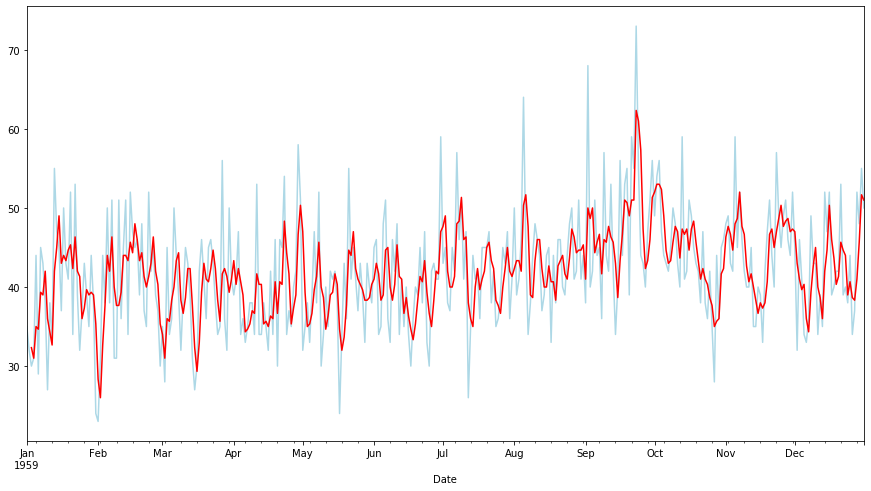

In [5]:
# plot original and transformed dataset - series.rolling(window=3)
rcParams['figure.figsize'] = 15, 8
series.plot(color='lightblue')
rolling_mean.plot(color='red')
pyplot.show()

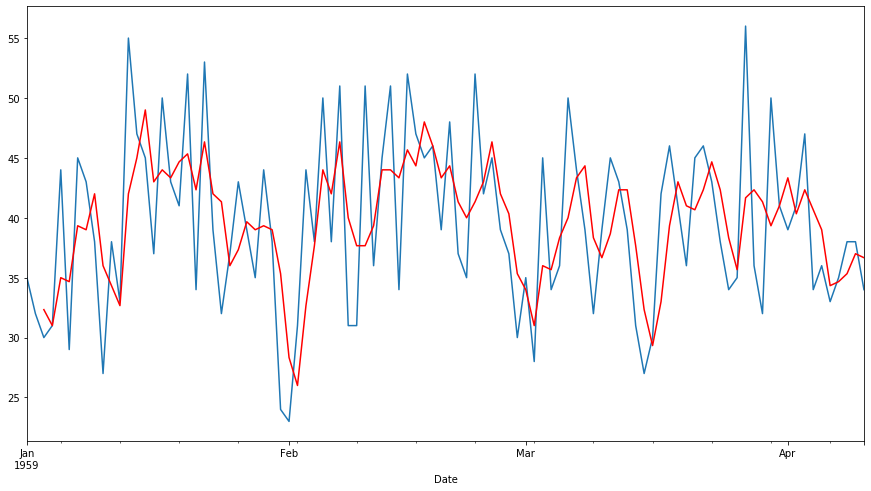

In [6]:
# zoomed plot original and transformed dataset - series.rolling(window=3)
rcParams['figure.figsize'] = 15, 8
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

### series.rolling(window=4)

In [7]:
rolling4 = series.rolling(window=4)
rolling_mean4 = rolling4.mean()
print(rolling_mean4.head(10))

Date
1959-01-01      NaN
1959-01-02      NaN
1959-01-03      NaN
1959-01-04    32.00
1959-01-05    34.25
1959-01-06    33.50
1959-01-07    37.25
1959-01-08    40.25
1959-01-09    38.75
1959-01-10    38.25
Name: Births, dtype: float64


In [8]:
# obs(t) = 1/4 * (obs(t-3) + obs(t-2) + obs(t-1) + obs(t))
print(1/4 * (35 + 32 + 30 + 31))
print(1/4 * (32 + 30 + 31 + 44))
print(1/4 * (30 + 31 + 44 + 29))
print(1/4 * (31 + 44 + 29 + 45))

32.0
34.25
33.5
37.25


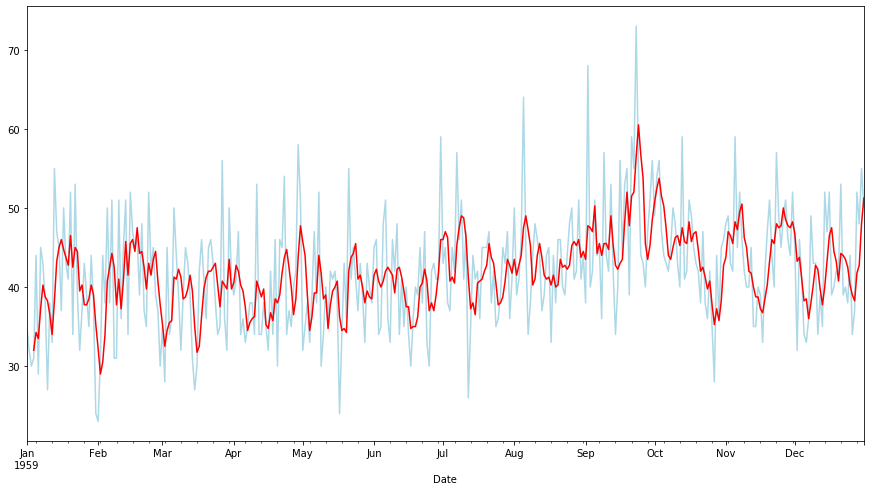

In [9]:
# plot original and transformed dataset - series.rolling(window=4)
rcParams['figure.figsize'] = 15, 8
series.plot(color='lightblue')
rolling_mean4.plot(color='red')
pyplot.show()

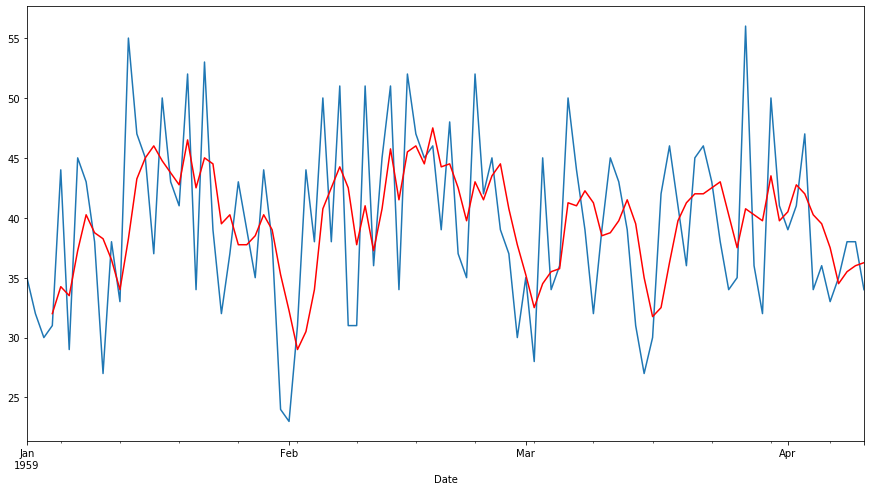

In [10]:
# zoomed plot original and transformed dataset - series.rolling(window=3)
rcParams['figure.figsize'] = 15, 8
series[:100].plot()
rolling_mean4[:100].plot(color='red')
pyplot.show()

## 9.5 Moving Average as Feature Engineering

The moving average can be used as a source of new information when modeling a time series forecast as a supervised learning problem. In this case, the moving average is calculated and added as a new input feature used to predict the next time step.

- First, a copy of the series must be shifted forward by one time step. This will represent the input to our prediction problem, or a lag=1 version of the series.
- Next, a second copy of the series needs to be shifted forward by one, minus the window size. This is to ensure that the moving average summarizes the last few values and does not include the value to be predicted in the average, which would be an invalid framing of the problem as the input would contain knowledge of the future being predicted.

In [11]:
# moving average smoothing as feature engineering
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

csvfile = '.\\code\\chapter_09\\daily-total-female-births.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

df = DataFrame(series.values)

width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


In [12]:
lag1.head(5)

,0
0,NaN
1,35.0
2,32.0
3,30.0
4,31.0


In [13]:
lag3.head(5)

,0
0,NaN
1,NaN
2,35.0
3,32.0
4,30.0


## 9.6 Moving Average as Prediction

The moving average value can also be used directly to make predictions. It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. **The moving average model for predictions can easily be used in a walk-forward manner**. As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day.

In [14]:
# moving average smoothing as a forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

csvfile = '.\\code\\chapter_09\\daily-total-female-births.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


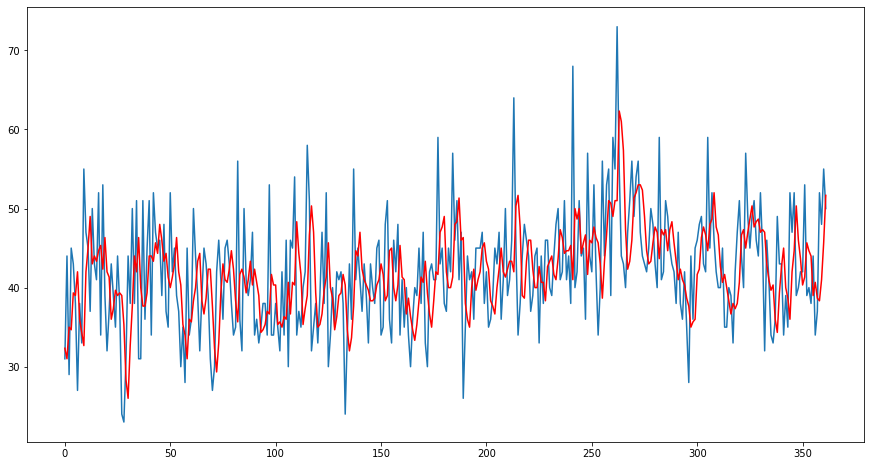

In [15]:
# plot
rcParams['figure.figsize'] = 15, 8
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

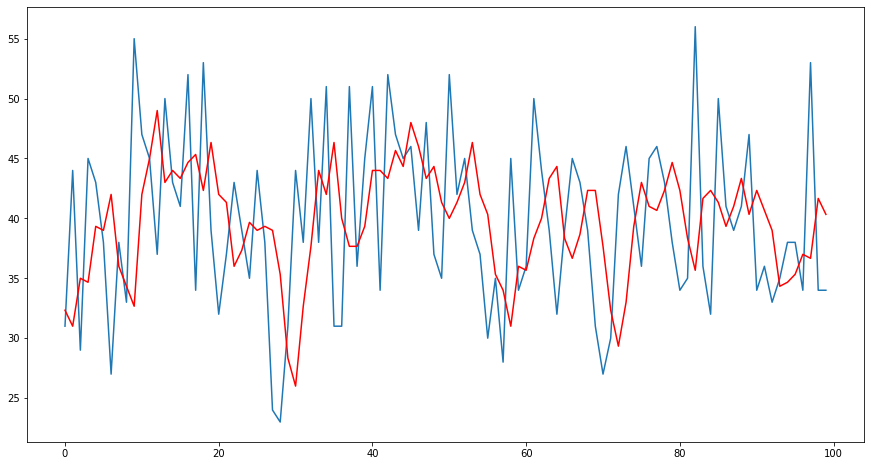

In [16]:
# zoom plot
rcParams['figure.figsize'] = 15, 8
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()